In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

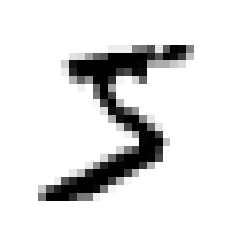

In [10]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [14]:
y[0]

5

In [15]:
import numpy as np

In [16]:
y = y.astype(np.uint8)

In [17]:
# Dividing the dataset into Training and Test set

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [19]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [20]:
from sklearn.linear_model import SGDClassifier

In [21]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
sgd_clf.predict([some_digit])

array([ True])

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [24]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

/Users/wonhee/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [26]:
for train_idx, test_idx in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_idx]
    y_train_folds = y_train_5[train_idx]
    X_test_folds = X_train[test_idx]
    y_test_folds = y_train_5[test_idx]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))
    

0.95035
0.96035
0.9604


In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [29]:
from sklearn.base import BaseEstimator

In [30]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [31]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [32]:
from sklearn.model_selection import cross_val_predict

In [33]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [36]:
y_train_perfect_pred = y_train_5
confusion_matrix(y_train_5, y_train_perfect_pred)

array([[54579,     0],
       [    0,  5421]])

In [37]:
from sklearn.metrics import precision_score, recall_score

In [38]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [39]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [40]:
from sklearn.metrics import f1_score

In [41]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [42]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [44]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [46]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)

In [47]:
y_some_digit_pred

array([False])

In [49]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [50]:
from sklearn.metrics import precision_recall_curve

In [51]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

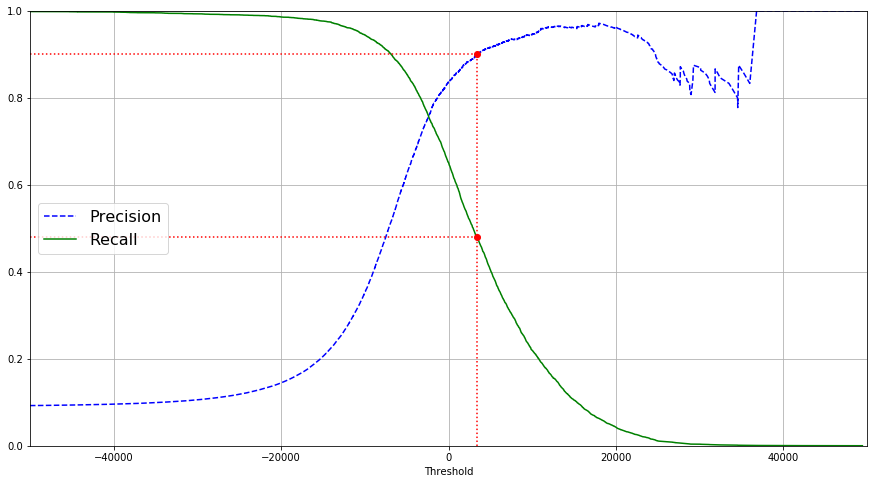

In [80]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left', fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    
recall_90_precision = recalls[np.argmax(precisions>=0.90)]
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]

plt.figure(figsize=(15, 8))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], 'r:') # red vertical line at threshold from 0 to 0.9 length
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], 'r:') # red horizontal line(top line) showing the threshold value for precision at threshold value
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], 'r:') # red horizontal bottom line showing the threshold value for recall at threshold value
plt.plot([threshold_90_precision], [0.9], 'ro:')
plt.plot([threshold_90_precision], [recall_90_precision], 'ro:')
plt.show()

In [62]:
threshold

8000

In [86]:
threshold_90_precision

3370.0194991439557

In [87]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [88]:
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [89]:
precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90)

(0.9000345901072293, 0.4799852425751706)

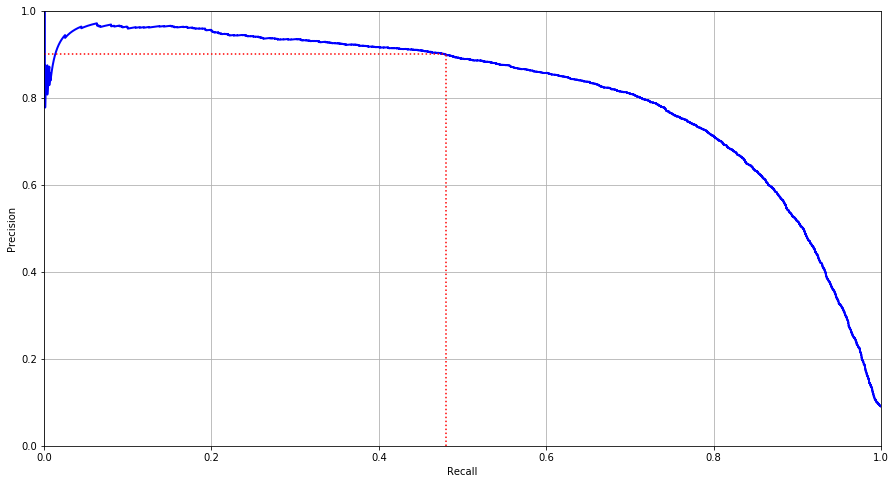

In [96]:
def precision_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth = 2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.axis([0., 1.0, 0., 1.0])
    
plt.figure(figsize=(15, 8))
precision_recall(precisions, recalls)
plt.plot([0.4799, 0.4799], [0., 0.9], 'r:')
plt.plot([0., 0.4799], [0.9, 0.9], 'r:')
plt.plot([4799], [0.9], 'ro:')
plt.show()

In [97]:
from sklearn.metrics import roc_curve

In [98]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

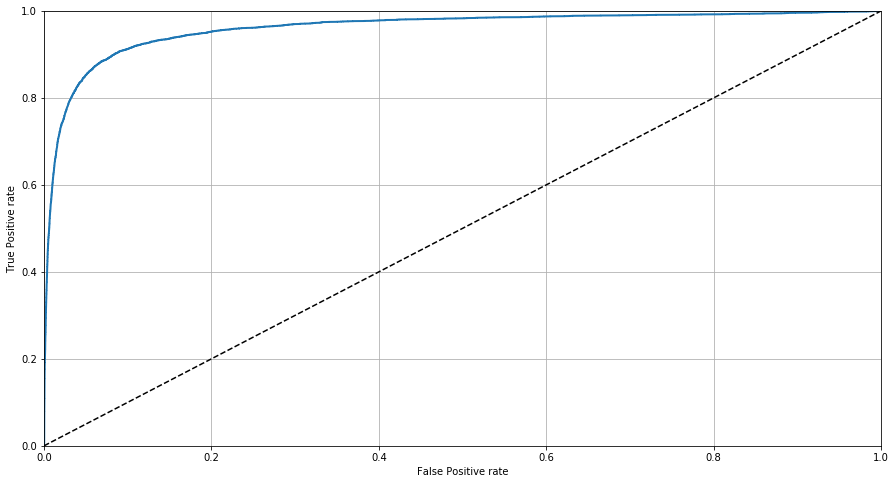

In [103]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.grid(True)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(15, 8))
plot_roc_curve(fpr, tpr)
plt.show()

In [104]:
from sklearn.metrics import roc_auc_score

In [105]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
forest_clf = RandomForestClassifier(random_state=42)

In [108]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [109]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_foresst = roc_curve(y_train_5, y_scores_forest)

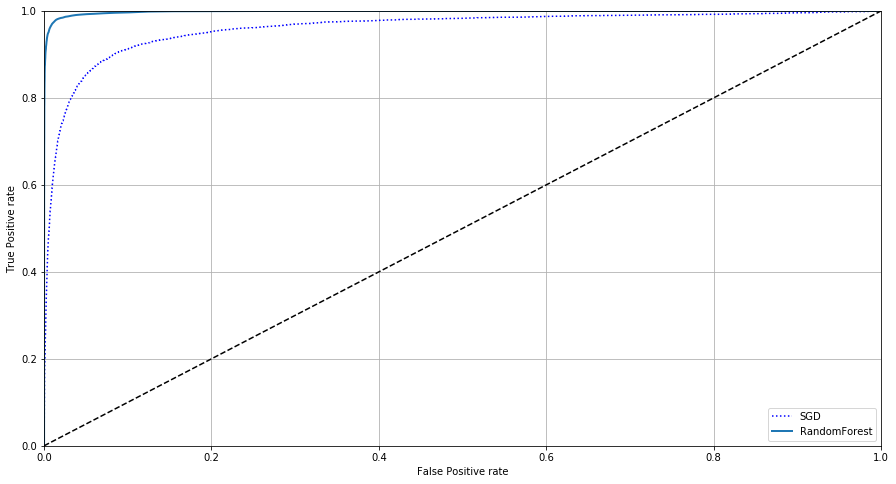

In [111]:
plt.figure(figsize=(15, 8))
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'RandomForest')
plt.legend(loc='lower right')
plt.show()

In [112]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [113]:
from sklearn.svm import SVC

In [114]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [115]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [116]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [117]:
np.argmax(some_digit_scores)

5

In [118]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [119]:
svm_clf.classes_[5]

5

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
scaler = StandardScaler()

In [123]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

In [125]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

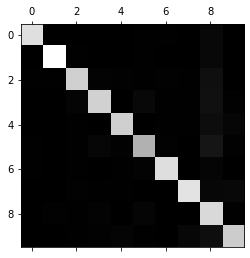

In [126]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [127]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

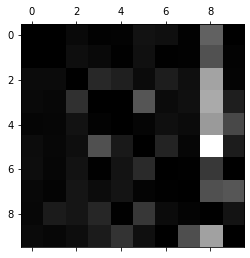

In [128]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)